In [201]:
from skimage.color import rgb2gray
import numpy as np 
import matplotlib.pyplot as plt
#%matplotlib inlne
from scipy import ndimage

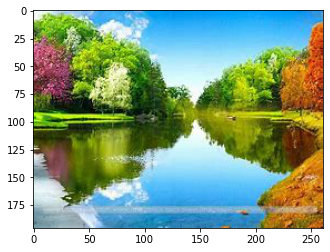

In [202]:
image=plt.imread('4.jpeg')


plt.imshow(image)

In [203]:
image.shape

(196, 261, 3)

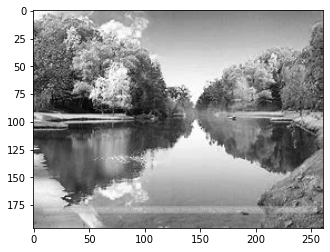

In [204]:
grayScaleImage=rgb2gray(image) #convert to gray so we can work in 2 channels or dimensions

plt.imshow(grayScaleImage,cmap='gray')

In [205]:
grayScaleImage.shape

(196, 261)

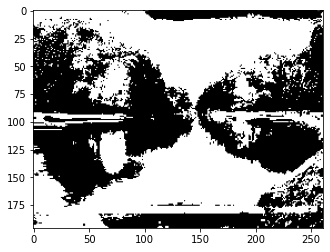

In [206]:
#establishing a backgound and a foreground
grayScaleImage_r=grayScaleImage.reshape(grayScaleImage.shape[0]*grayScaleImage.shape[1])

for i in range(grayScaleImage_r.shape[0]):
    
    if grayScaleImage_r[i] > grayScaleImage_r.mean():
        
        grayScaleImage_r[i]=1
        
    else:
        
        grayScaleImage_r[i]=0

grayScaleImage=grayScaleImage_r.reshape(grayScaleImage.shape[0],grayScaleImage.shape[1])

plt.imshow(grayScaleImage,cmap='gray')
        
        

    


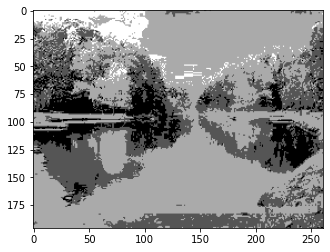

In [207]:
#segmenting into four different segments
#segments are 0,1,2,3
grayScaleImage=rgb2gray(image)

grayScaleImage_r=grayScaleImage.reshape(grayScaleImage.shape[0]*grayScaleImage.shape[1])

for i in range(grayScaleImage_r.shape[0]):
    
    if grayScaleImage_r[i] > grayScaleImage_r.mean():
        
        grayScaleImage_r[i]=3
    
    elif grayScaleImage_r[i] > 0.5:
        
        grayScaleImage_r[i]=2
    
    elif grayScaleImage_r[i]>0.25:
        
        grayScaleImage_r[i]=1
        
       
    else:
        grayScaleImage_r[i]=0

grayScaleImage=grayScaleImage_r.reshape(grayScaleImage.shape[0],grayScaleImage.shape[1])

plt.imshow(grayScaleImage,cmap='gray')

#can be seen from plot below that the pixels may overlap and can make it hard to see

***Using K-means clustering to sort out the image***

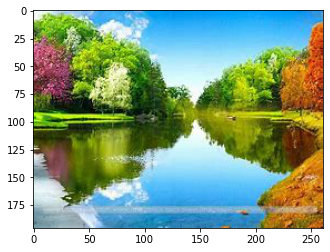

In [208]:
image2=plt.imread('4.jpeg')

plt.imshow(image2)

In [209]:
image2.shape

(196, 261, 3)

In [210]:
#k-means clustering uses (length*width,channels)
#reshaping image2

image2_r=image.reshape(image2.shape[0]*image2.shape[1],image2.shape[2])

image2_r.shape

(51156, 3)

In [211]:
from sklearn.cluster import KMeans


kmeans=KMeans(n_clusters=5, random_state=0).fit(image2_r)

image2_k=kmeans.cluster_centers_[kmeans.labels_]


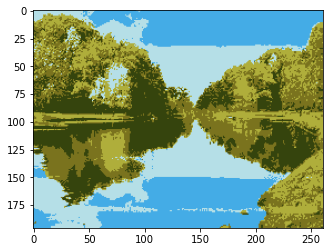

In [213]:
cluster_image=image2_k.reshape(image2.shape[0],image2.shape[1],image2.shape[2])

plt.imshow(cluster_image.astype('uint8'),cmap='gray')